## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Pratik
 
### The Spark Foundation Task

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading data from remote link

s_data = pd.read_csv('student_score.csv')
print("Data imported successfully")

s_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

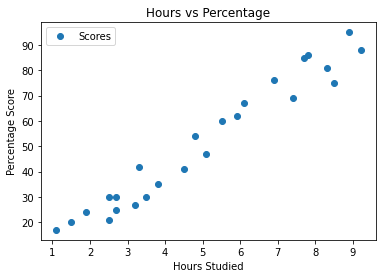

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

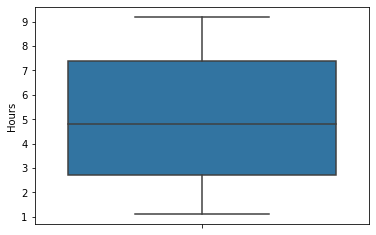

In [4]:
sns.boxplot(y='Hours', data=s_data)
plt.show()

In [5]:
temp=list(s_data["Hours"])
print("Median of Hours {0}".format(np.median(s_data["Hours"])))
print("Median of Hours {0}".format(np.mean(s_data["Hours"])))

print("\nQuantiles:")
print(np.percentile(s_data["Hours"],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(s_data["Hours"]))

Median of Hours 4.8
Median of Hours 5.012

Quantiles:
[1.1 2.7 4.8 7.4]

Median Absolute Deviation
3.1134646588617647


##### Median is not affected By outliers but mean get affected 

In [6]:
temp.append(200)# adding outliers
print("Median of Hours with outliers {0}".format(np.median(temp)))
print("Mean of Hours with outliers {0}".format(np.mean(temp)))
      

Median of Hours with outliers 4.949999999999999
Mean of Hours with outliers 12.511538461538462


[0.12 0.16 0.12 0.04 0.12 0.08 0.04 0.08 0.12 0.12]
[1.1  1.91 2.72 3.53 4.34 5.15 5.96 6.77 7.58 8.39 9.2 ]


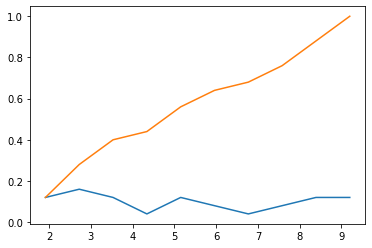

In [7]:
counts, bin_edges = np.histogram(s_data['Hours'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


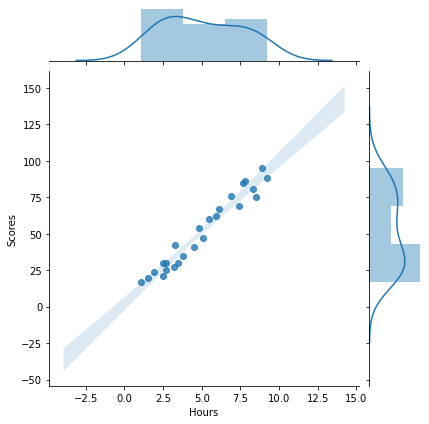

In [8]:
sns.jointplot("Hours", "Scores", s_data, kind='reg');

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


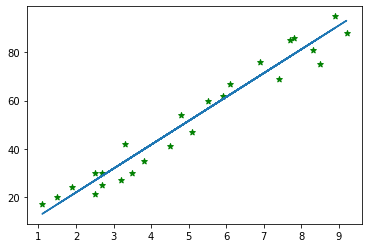

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='g',marker='*')
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [14]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
# You can also test with your own data
hours = [9.25]
own_pred = regressor.predict(np.reshape(hours,(1,-1)))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737535


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
